In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned dataset
# Update the file path as needed
file_path = "cleaned_events.csv"
df = pd.read_csv(file_path)


In [3]:
# Convert 'event_time' to datetime if not already done
df['event_time'] = pd.to_datetime(df['event_time'])


In [4]:
# Set plotting style
sns.set(style="whitegrid")


In [5]:
# Display basic information
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884474 entries, 0 to 884473
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   event_time         884474 non-null  datetime64[ns, UTC]
 1   event_type         884474 non-null  object             
 2   product_id         884474 non-null  int64              
 3   category_id        884474 non-null  int64              
 4   category_code      884474 non-null  object             
 5   brand              884474 non-null  object             
 6   price              884474 non-null  float64            
 7   user_id            884474 non-null  int64              
 8   user_session       884474 non-null  object             
 9   event_date         884474 non-null  object             
 10  event_hour         884474 non-null  int64              
 11  event_day_of_week  884474 non-null  int64              
dtypes: datetime6

In [6]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [7]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe(include="all"))



Summary Statistics:
                                 event_time event_type    product_id  \
count                                884474     884474  8.844740e+05   
unique                                  NaN          3           NaN   
top                                     NaN       view           NaN   
freq                                    NaN     793099           NaN   
mean    2020-12-14 11:06:15.243217408+00:00        NaN  1.906840e+06   
min               2020-09-24 11:57:06+00:00        NaN  1.020000e+02   
25%     2020-11-05 20:50:18.249999872+00:00        NaN  6.988030e+05   
50%               2020-12-14 15:34:45+00:00        NaN  1.452884e+06   
75%        2021-01-23 07:20:05.500000+00:00        NaN  3.721194e+06   
max               2021-02-28 23:59:09+00:00        NaN  4.183880e+06   
std                                     NaN        NaN  1.458710e+06   

         category_id category_code    brand          price       user_id  \
count   8.844740e+05        884474   8


Event Type Distribution:
event_type
view        793099
cart         54032
purchase     37343
Name: count, dtype: int64


C:\Users\bhawa\AppData\Local\Temp\ipykernel_8188\2479138573.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='event_type', order=event_type_counts.index, palette="muted")


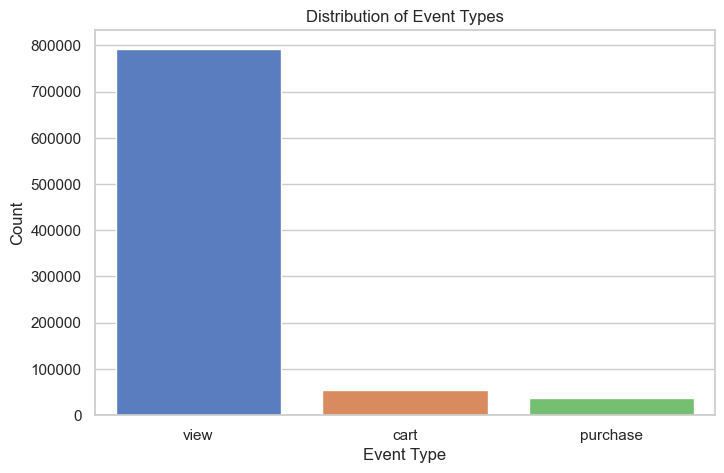

In [8]:
# ------------------------------------------------------------------------
# 1. Distribution of Event Types
# ------------------------------------------------------------------------
print("\nEvent Type Distribution:")
event_type_counts = df['event_type'].value_counts()
print(event_type_counts)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='event_type', order=event_type_counts.index, palette="muted")
plt.title("Distribution of Event Types")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

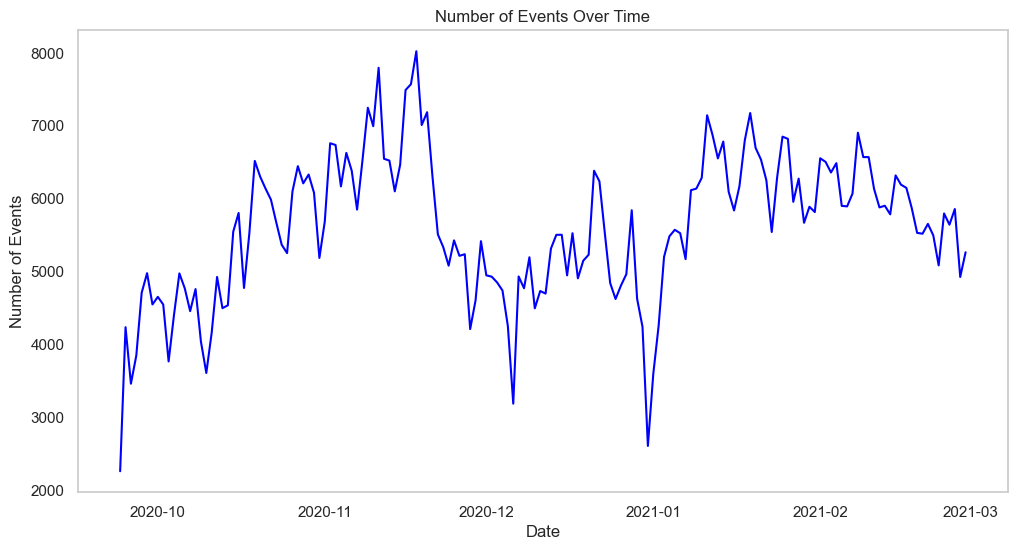

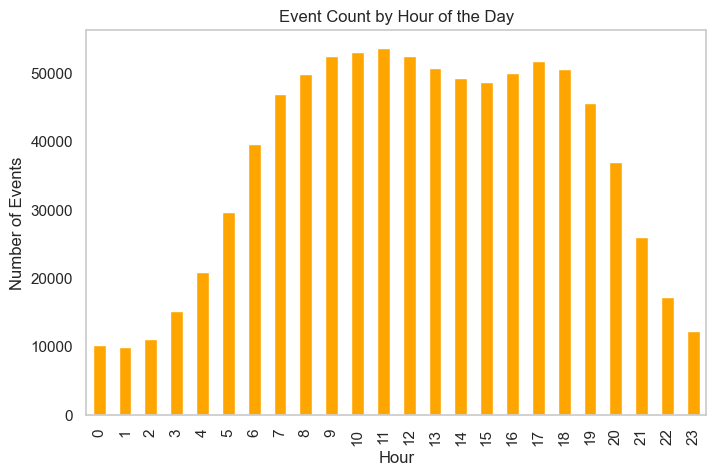

In [10]:
# ------------------------------------------------------------------------
# 2. Event Time Analysis
# ------------------------------------------------------------------------
# Events over time
df['event_date'] = df['event_time'].dt.date
daily_events = df.groupby('event_date')['event_type'].count()

plt.figure(figsize=(12, 6))
daily_events.plot(kind='line', color='blue')
plt.title("Number of Events Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.grid()
plt.show()

# Hourly event distribution
df['event_hour'] = df['event_time'].dt.hour
hourly_events = df['event_hour'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
hourly_events.plot(kind='bar', color='orange')
plt.title("Event Count by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Events")
plt.grid()
plt.show()



Top 10 Categories:
category_code
Unknown                             236047
computers.components.videocards     116611
electronics.telephone                84308
computers.peripherals.printer        43193
stationery.cartrige                  38699
electronics.audio.acoustic           26749
computers.components.motherboard     26585
computers.notebook                   25024
computers.components.cpu             24750
electronics.video.tv                 21373
Name: count, dtype: int64


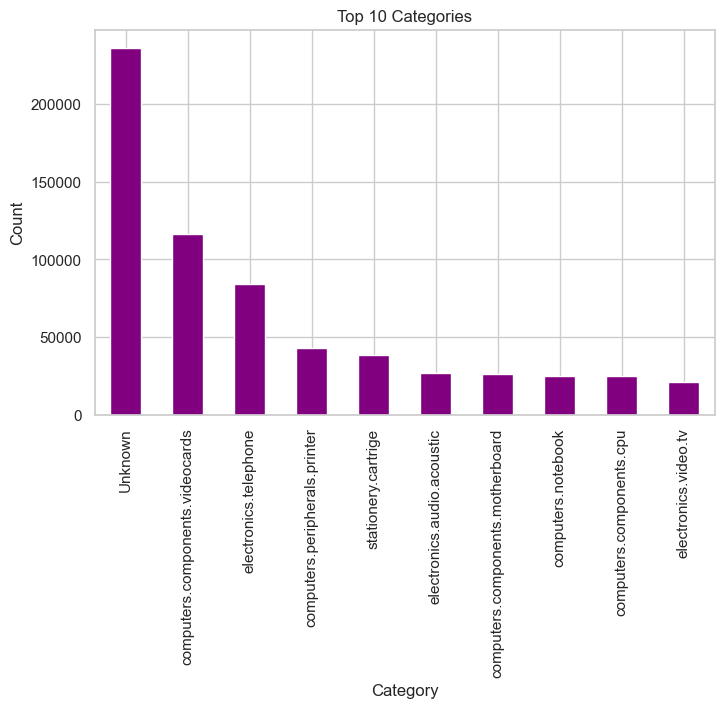


Top 10 Brands:
brand
Unknown      212232
asus          27660
gigabyte      27652
msi           24864
palit         24787
samsung       23188
amd           20095
canon         18430
panasonic     11977
pioneer       11463
Name: count, dtype: int64


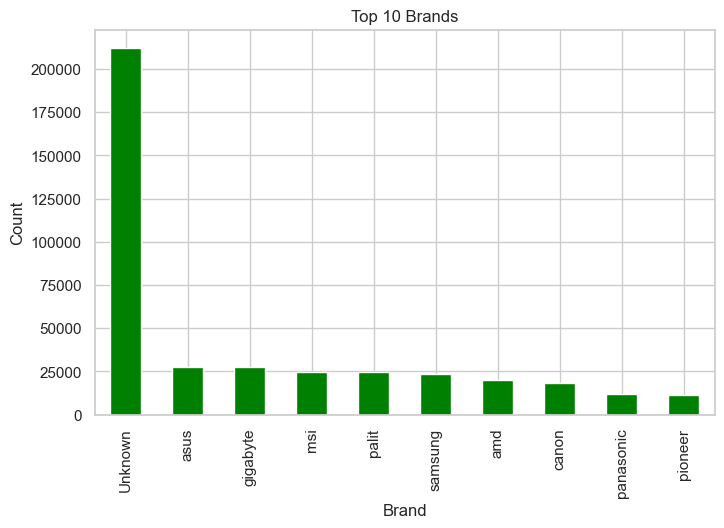

In [12]:
# ------------------------------------------------------------------------
# 3. Top Categories and Brands
# ------------------------------------------------------------------------
# Top 10 Categories
print("\nTop 10 Categories:")
top_categories = df['category_code'].value_counts().head(10)
print(top_categories)

plt.figure(figsize=(8, 5))
top_categories.plot(kind='bar', color='purple')
plt.title("Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


# Top 10 Brands
print("\nTop 10 Brands:")
top_brands = df['brand'].value_counts().head(10)
print(top_brands)

plt.figure(figsize=(8, 5))
top_brands.plot(kind='bar', color='green')
plt.title("Top 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()



Price Analysis:
count    884474.000000
mean        146.331556
std         296.864505
min           0.220000
25%          26.460000
50%          65.710000
75%         190.540000
max       64771.060000
Name: price, dtype: float64


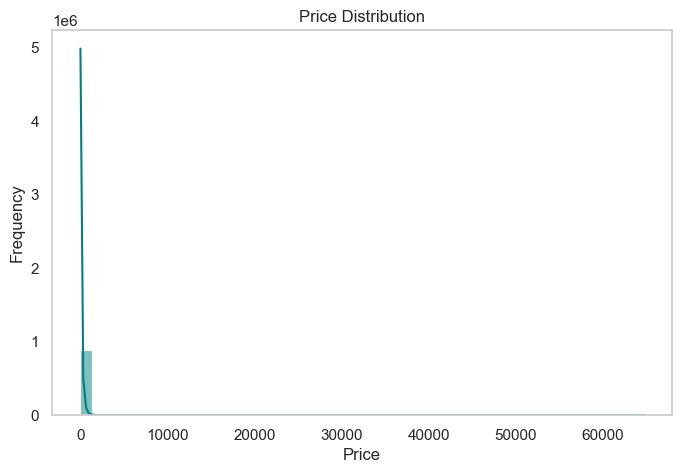

In [13]:
# ------------------------------------------------------------------------
# 4. Price Analysis
# ------------------------------------------------------------------------
print("\nPrice Analysis:")
print(df['price'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True, color='teal')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid()
plt.show()

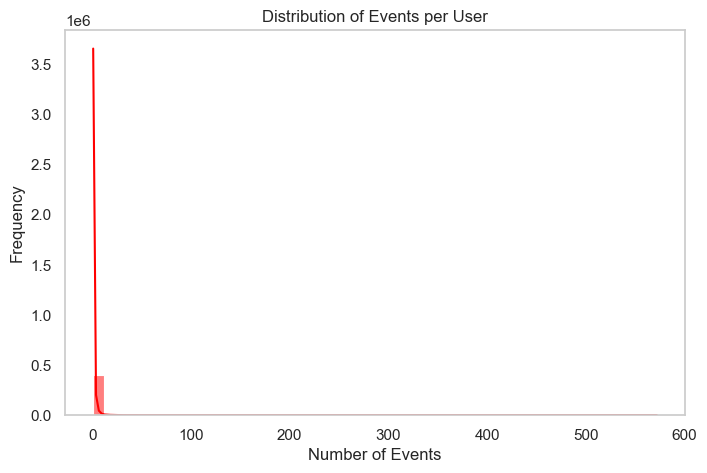

In [14]:
# ------------------------------------------------------------------------
# 5. User Activity Analysis
# ------------------------------------------------------------------------
# Number of events per user
user_activity = df.groupby('user_id')['event_type'].count()

plt.figure(figsize=(8, 5))
sns.histplot(user_activity, bins=50, kde=True, color='red')
plt.title("Distribution of Events per User")
plt.xlabel("Number of Events")
plt.ylabel("Frequency")
plt.grid()
plt.show()



Sample Transition Ratios:
event_type           cart  purchase  view  view_to_cart_ratio  \
user_id                                                         
1515915625353226922   0.0       0.0   1.0                 0.0   
1515915625353230067   0.0       0.0   1.0                 0.0   
1515915625353230683   0.0       0.0  13.0                 0.0   
1515915625353230922   0.0       0.0   1.0                 0.0   
1515915625353234047   0.0       0.0  36.0                 0.0   

event_type           cart_to_purchase_ratio  
user_id                                      
1515915625353226922                     0.0  
1515915625353230067                     0.0  
1515915625353230683                     0.0  
1515915625353230922                     0.0  
1515915625353234047                     0.0  


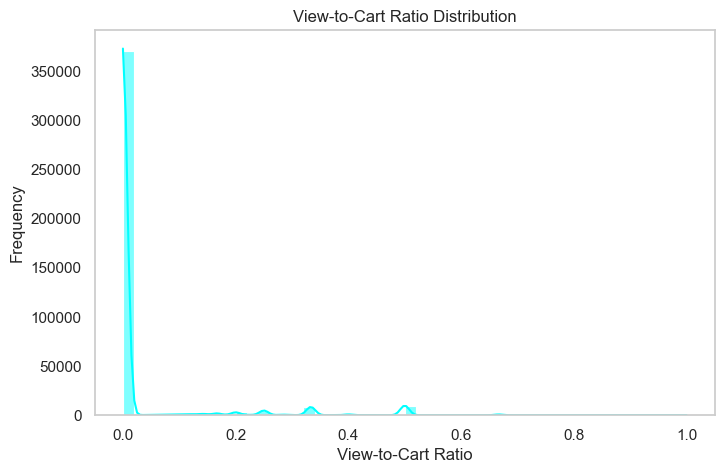

In [15]:
# ------------------------------------------------------------------------
# 6. Event Transition Analysis
# ------------------------------------------------------------------------
# Transition counts (view -> cart -> purchase)
transitions = df.groupby(['user_id', 'event_type'])['event_time'].count().unstack().fillna(0)
transitions['view_to_cart_ratio'] = transitions['cart'] / (transitions['view'] + 1)
transitions['cart_to_purchase_ratio'] = transitions['purchase'] / (transitions['cart'] + 1)

print("\nSample Transition Ratios:")
print(transitions.head())

# Plot view-to-cart ratio
plt.figure(figsize=(8, 5))
sns.histplot(transitions['view_to_cart_ratio'], bins=50, kde=True, color='cyan')
plt.title("View-to-Cart Ratio Distribution")
plt.xlabel("View-to-Cart Ratio")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [16]:
# ------------------------------------------------------------------------
# 7. Summary of Findings
# ------------------------------------------------------------------------
print("\nSummary of Findings:")
print("- Event types are distributed as shown in the plot above.")
print("- Events per day show spikes, possibly indicating campaigns or sales periods.")
print("- Most events occur during specific hours, indicating user activity peaks.")
print("- Top categories and brands provide insight into user preferences.")
print("- Price distribution shows the range and frequency of prices users engage with.")
print("- User activity distribution shows most users have low engagement, with a few highly active users.")



Summary of Findings:
- Event types are distributed as shown in the plot above.
- Events per day show spikes, possibly indicating campaigns or sales periods.
- Most events occur during specific hours, indicating user activity peaks.
- Top categories and brands provide insight into user preferences.
- Price distribution shows the range and frequency of prices users engage with.
- User activity distribution shows most users have low engagement, with a few highly active users.
